#### Importing the libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

#### Loading the dataset 

The Fashion MNIST dataset contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels)

<img src="fashion-mnist-sprite.png" />

In [2]:
(X_train, y_train), (X_test,y_test) = keras.datasets.fashion_mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

#### Define the classes

In [5]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#### Data Visualization

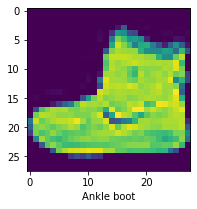

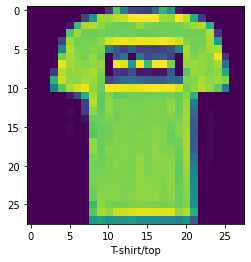

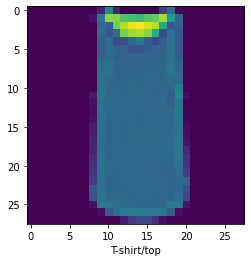

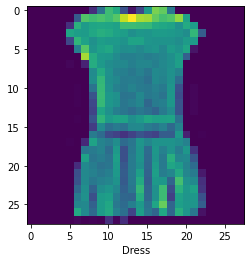

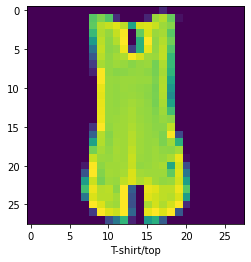

In [6]:
plt.figure(figsize=(3,3))
for i in range(5):
    plt.imshow(X_train[i])
    plt.xlabel(classes[y_train[i]])
    plt.show()

In [7]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

#### Data Preprocessing

##### Scale images

In [8]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [9]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

#### Initializing the ANN

In [10]:
model = keras.Sequential([
            keras.layers.Flatten(input_shape=(28,28)),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(500, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')    
        ])


#### Compiling the ANN

In [11]:
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

#### Training the ANN on the Training set

In [12]:
history =  model.fit(X_train_scaled, y_train, batch_size = 32, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.5710 - accuracy: 0.79600s - loss: 0.5718 - accura
Epoch 2/10
1875/1875 [==============================] - ETA: 0s - loss: 0.3632 - accuracy: 0.86 - 26s 14ms/step - loss: 0.3632 - accuracy: 0.8652
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3201 - accuracy: 0.8812
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2943 - accuracy: 0.8899
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2752 - accuracy: 0.8966
Epoch 6/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2629 - accuracy: 0.90153s -
Epoch 7/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.2528 - accuracy: 0.9026
Epoch 8/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.2363 - accuracy: 0.9096
Epoch 9/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2270 - accuracy:

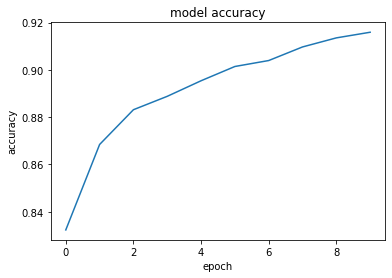

In [13]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

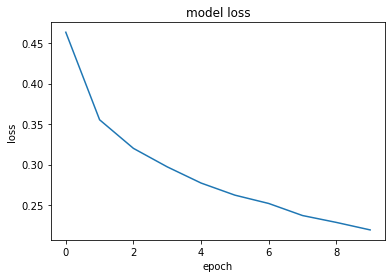

In [14]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#### Evaluate the model

In [15]:
model.evaluate(X_test_scaled,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.3955 - accuracy: 0.8706


[0.3954995274543762, 0.8705999851226807]

#### classification report

In [16]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(X_test_scaled)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report")
print(classification_report(y_test,y_pred_classes))

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.89      0.85      1000
           1       1.00      0.97      0.98      1000
           2       0.77      0.76      0.76      1000
           3       0.91      0.85      0.88      1000
           4       0.64      0.92      0.75      1000
           5       0.96      0.98      0.97      1000
           6       0.82      0.45      0.58      1000
           7       0.96      0.94      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000



#### Heatmap

Text(69.0, 0.5, 'Truth')

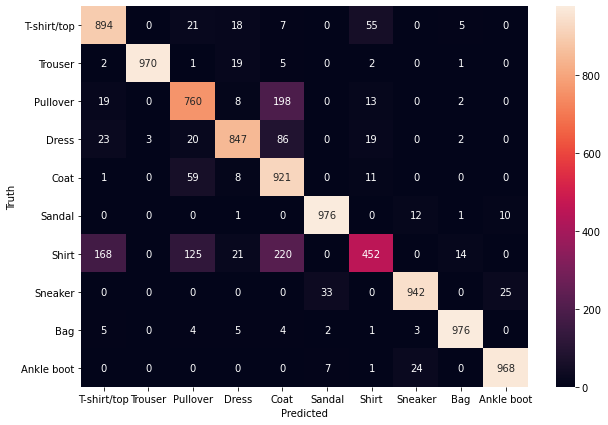

In [17]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred_classes)
plt.figure(figsize = (10,7))
sn.heatmap(data=cm, annot=True, fmt='d', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Truth')